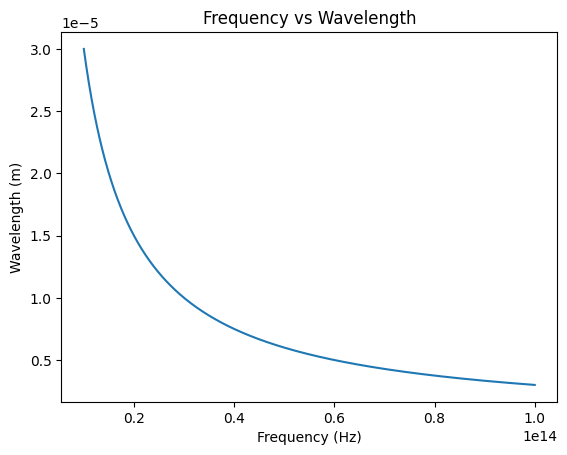

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 3e8  # Speed of light in m/s

# Frequency range (in Hz)
freq_start = 1e13  # 1 MHz
freq_end = 1e14  # 100 GHz
num_points = 1000

# Calculate corresponding wavelengths
frequencies = np.linspace(freq_start, freq_end, num_points)
wavelengths = c / frequencies

# Plot the conversion between frequency and wavelength
plt.figure()
plt.plot(frequencies, wavelengths)

# Format the y-axis in scientific notation
plt.gca().yaxis.get_major_formatter().set_useOffset(False)
plt.gca().yaxis.get_major_formatter().set_scientific(True)
plt.gca().yaxis.get_major_formatter().set_powerlimits((-3, 4))

# Set axis labels and title
plt.xlabel('Frequency (Hz)')
plt.ylabel('Wavelength (m)')
plt.title('Frequency vs Wavelength')

# Show the plot
plt.show()


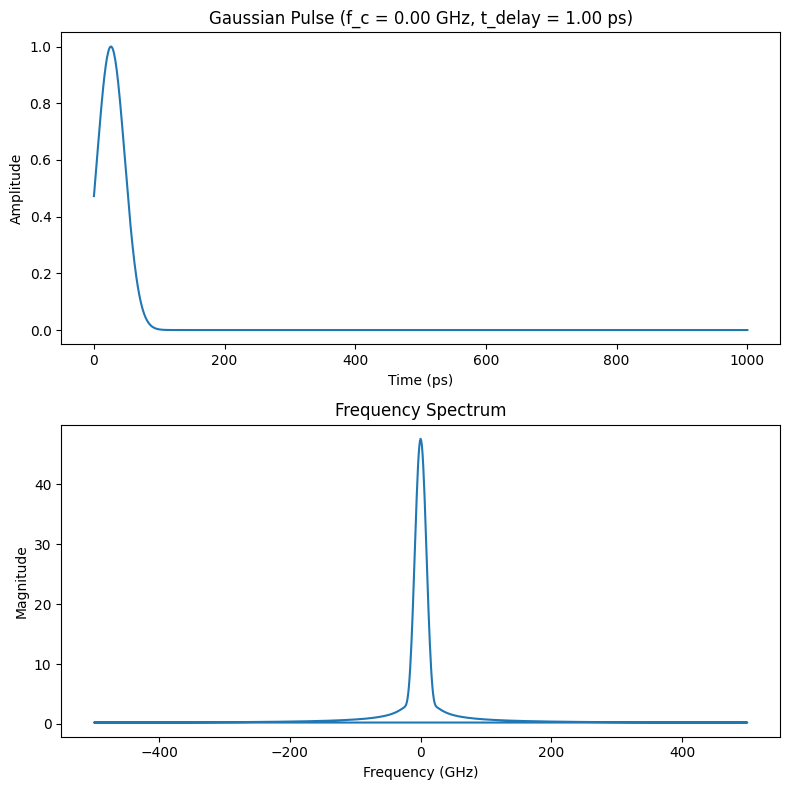

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Prompt user to enter pulse parameters
f_center = float(input("Enter center frequency in Hz: "))
f_width = float(input("Enter frequency width in Hz: "))
t_delay = float(input("Enter time delay in seconds: "))

# Define pulse parameters
t_width = 50e-12        # Time width of pulse in seconds
dt = 1e-12              # Time step size in seconds
t_max = 1000e-12        # Maximum simulation time in seconds

# Create time array
t = np.arange(0, t_max, dt)

# Calculate Gaussian pulse waveform with time delay
gaussian_pulse = np.exp(-(t-t_delay-t_width/2)**2/(2*(t_width/2.355)**2)) * np.cos(2*np.pi*f_center*(t-t_delay))

# Calculate frequency spectrum using Fourier transform
freq = np.fft.fftfreq(len(t), dt)
freq_spectrum = np.fft.fft(gaussian_pulse)
freq_spectrum = np.abs(freq_spectrum)

# Plot pulse waveform and frequency spectrum
fig, axs = plt.subplots(2,1,figsize=(8,8))
axs[0].plot(t*1e12, gaussian_pulse)
axs[0].set_xlabel('Time (ps)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Gaussian Pulse (f_c = %.2f GHz, t_delay = %.2f ps)' % (f_center/1e9, t_delay*1e12))
axs[1].plot(freq/1e9, freq_spectrum)
axs[1].set_xlabel('Frequency (GHz)')
axs[1].set_ylabel('Magnitude')
axs[1].set_title('Frequency Spectrum')
plt.tight_layout()
plt.show()


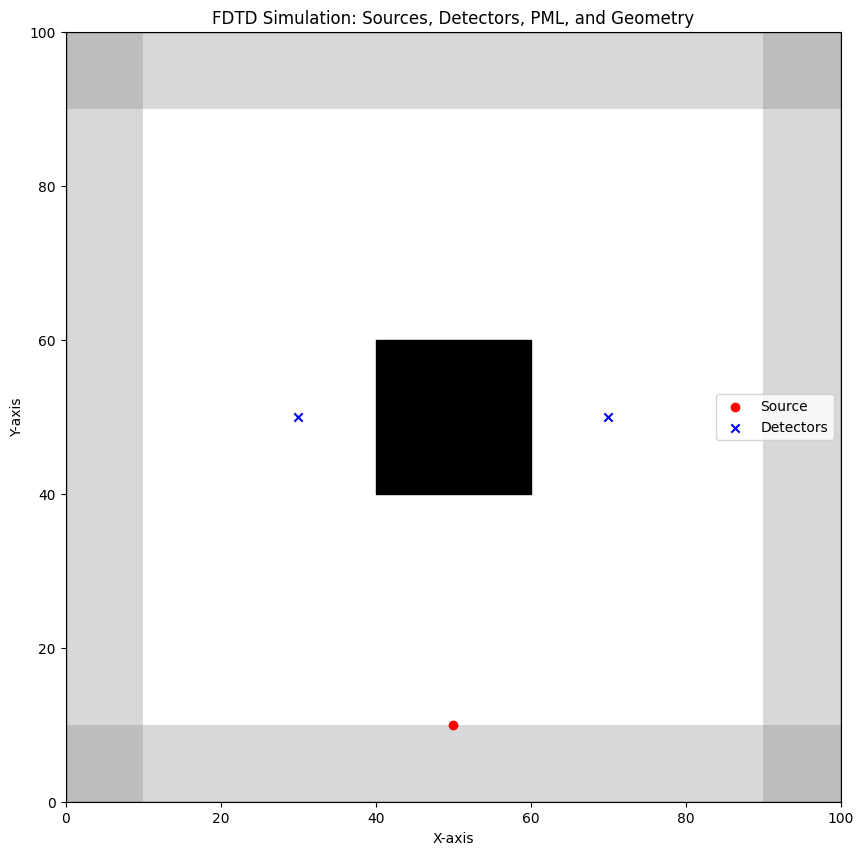

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# FDTD Simulation Parameters
domain_size = (100, 100)
source_position = (50, 10)
detector_positions = [(30, 50), (70, 50)]
pml_thickness = 10
geometry = [(40, 40, 20, 20)]

# Plotting Function
def plot_fdtd_simulation(domain_size, source_position, detector_positions, pml_thickness, geometry):
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot Domain
    domain = patches.Rectangle((0, 0), domain_size[0], domain_size[1], edgecolor='k', facecolor='none')
    ax.add_patch(domain)

    # Plot PML
    pml_left = patches.Rectangle((0, 0), pml_thickness, domain_size[1], edgecolor='none', facecolor='gray', alpha=0.3)
    pml_right = patches.Rectangle((domain_size[0] - pml_thickness, 0), pml_thickness, domain_size[1], edgecolor='none', facecolor='gray', alpha=0.3)
    pml_top = patches.Rectangle((0, domain_size[1] - pml_thickness), domain_size[0], pml_thickness, edgecolor='none', facecolor='gray', alpha=0.3)
    pml_bottom = patches.Rectangle((0, 0), domain_size[0], pml_thickness, edgecolor='none', facecolor='gray', alpha=0.3)
    ax.add_patch(pml_left)
    ax.add_patch(pml_right)
    ax.add_patch(pml_top)
    ax.add_patch(pml_bottom)

    # Plot Source
    source = plt.scatter(*source_position, color='red', marker='o', label='Source')

    # Plot Detectors
    detectors = plt.scatter(*zip(*detector_positions), color='blue', marker='x', label='Detectors')

    # Plot Geometry
    for geom in geometry:
        x, y, w, h = geom
        rect = patches.Rectangle((x, y), w, h, edgecolor='black', facecolor='black')
        ax.add_patch(rect)

    plt.legend(handles=[source, detectors])
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("FDTD Simulation: Sources, Detectors, PML, and Geometry")
    plt.xlim(0, domain_size[0])
    plt.ylim(0, domain_size[1])
    plt.show()

# Call the Plotting Function
plot_fdtd_simulation(domain_size, source_position, detector_positions, pml_thickness, geometry)
